## Introduction to Wrapper Methods
Machine learning problems often involve datasets with many features. Some of those features might be very important for a specific machine learning model. Other features might be irrelevant. Given a feature set and a model, we would like to be able to distinguish between important and unimportant features (or even important combinations of features). Wrapper methods do exactly that.

A wrapper method for feature selection is an algorithm that selects features by evaluating the performance of a machine learning model on different subsets of features. These algorithms add or remove features one at a time based on how useful those features are to the model.

Wrapper methods have some advantages over filter methods. The main advantage is that wrapper methods evaluate features based on their performance with a specific model. Filter methods, on the other hand, can’t tell how important a feature is to a model.

Another upside of wrapper methods is that they can take into account relationships between features. Sometimes certain features aren’t very useful on their own but instead perform well only when combined with other features. Since wrapper methods test subsets of features, they can account for those situations.

This lesson will explain five different wrapper methods:

Sequential forward selection
Sequential backward selection
Sequential forward floating selection
Sequential backward floating selection
Recursive feature elimination
You’ll learn how to implement these algorithms in Python and evaluate the results.

Before we get started, let’s take a look at a dataset that you’ll use throughout this lesson.

Instructions

The data in the workspace was taken from the UCI Machine Learning Repository. The outcome variable, Classification, is a 1 if a patient has breast cancer and a 0 if not. The features are Age, BMI (body mass index), Glucose, Insulin, HOMA (homeostatic model assessment, a measure of insulin resistance), as well as four different protein levels: Leptin, Adiponectin, Resistin, and MCP.1.

Uncomment print(health.head()) and take a look at the data.

What are some pros and cons of having this many features?

In [2]:
import pandas as pd

# Load the data
health = pd.read_csv("data/dataR2.csv")

health.head()
#print(health.head())

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Setting Up a Logistic Regression Model
Before we can use a wrapper method, we need to specify a machine learning model. We’ll train a logistic regression model on the health data and see how well it performs.

We’ll prepare the data by splitting it into a pandas DataFrame X and a pandas Series y. X will contain the observations of the independent variables, and y will contain the observations of the dependent variable.

Here’s an example of how to do this. The fire dataset below was taken from the UCI Machine Learning Repository and cleaned for our analysis. Its features are Temperature, RH (relative humidity), Ws (wind speed), Rain, DMC (Duff Moisture Code), and FWI (Fire Weather Index). The final column, Classes, contains a 1 if there is a forest fire at a specific location on a given day and 0 if not.

import pandas as pd
 
# Load the data
fire = pd.read_csv("fire.csv")
# Split independent and dependent variables
X = fire.iloc[:,:-1]
y = fire.iloc[:,-1]
We can create a logistic regression model and fit it to X and y with scikit-learn using the following code.

from sklearn.linear_model import LogisticRegression
 
# Create and fit the logistic regression model
lr = LogisticRegression()
lr.fit(X, y)
Logistic regression models give a probability that an observation belongs to a category. In the fire dataset, probabilities greater than 0.5 are considered predictions that there is a fire, and probabilities less than 0.5 are considered predictions that there is no fire. In the health dataset, probabilities greater than 0.5 are considered predictions that a patient has breast cancer.

The accuracy of a logistic regression model is the percentage of correct predictions that it makes on a testing set. In scikit-learn, you can check the accuracy of a model with the .score() method.

print(lr.score(X,y))
This outputs:

0.9836065573770492
For our testing set, our logistic regression model correctly predicts whether a fire occurred 98.4% of the time.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
health = pd.read_csv("data/dataR2.csv")
# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]
"""The dataset health has been loaded and split into features X and outcome y for you in script.py. Use the .fit() method to fit lr to X and y.

(Side note: scikit-learn uses an algorithm that goes through many iterations to find optimal logistic regression coefficients. For this particular dataset, the algorithm doesn’t converge after the default maximum number of iterations, so we’ve included max_iter=1000 as a parameter in the LogisticRegression object just to make sure the algorithm converges.)"""
# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model
"""Use the .score() method to print the accuracy of the model and print it. How often does this model correctly predict whether or not a patient has breast cancer?"""
# Print the accuracy of the model
lr.fit(X,y)
print(lr.score(X,y))


0.8017241379310345


## Sequential Forward Selection
Now that we have a specific machine learning model, we can use a wrapper method to choose a smaller feature subset.

Sequential forward selection is a wrapper method that builds a feature set by starting with no features and then adding one feature at a time until a desired number of features is reached. In the first step, the algorithm will train and test a model using only one feature at a time. The algorithm keeps the feature that performs best.

In each subsequent step, the algorithm will test the model on each possible new feature addition. Whichever feature improves model performance the most is then added to the feature subset. This process stops once we have the desired number of features.

Let’s say we want to use three features, and we have five features to choose from: age, height, weight, blood_pressure, and resting_heart_rate. Sequential forward selection will train your machine learning model on five different feature subsets: one for each feature.

If the model performs best on the subset {age}, the algorithm will then train and test the model on the following four subsets:

{age, height}
{age, weight}
{age, blood_pressure}
{age, resting_heart_rate}
If the model performs best on {age, resting_heart_rate}, the algorithm will test the model on the following three subsets:

{age, height, resting_heart_rate}
{age, weight, resting_heart_rate}
{age, blood_pressure, resting_heart_rate}
If the model performs best on {age, weight, resting_heart_rate}, it will stop the algorithm and use that feature set.

Sequential forward selection is a greedy algorithm: instead of checking every possible feature set by brute force, it adds whichever feature gives the best immediate performance gain.

If you used sequential forward selection to add a fourth feature to the feature set {age, weight, resting_heart_rate} that you saw in the preceding example, what two feature sets would the algorithm test in the next step? Create sets called set1 and set2 that contain the appropriate features.

For example, if the answer was {height, resting_heart_rate} and {weight, resting_heart_rate}, you would type:

set1 = {"height", "resting_heart_rate"}
set2 = {"weight", "resting_heart_rate"}

In [6]:
set1 = {"age", "height", "weight", "resting_heart_rate"}
set2 = {"age", "weight", "blood_pressure", "resting_heart_rate"}

## Sequential Forward Selection with mlxtend
Recall from a previous exercise that the logistic regression model was about 80.2% accurate at predicting if a patient had breast cancer. But there were NINE different features. Are all of those features necessary, or is it possible that the model could make accurate predictions with fewer features? That would make the model easier to understand, and it could simplify diagnosis.

We will use the SFS class from Python’s mlxtend library to implement sequential forward selection and choose a subset of just THREE features for the logistic regression model that we used earlier.

# Set up SFS parameters
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0)
# Fit SFS to our features X and outcome y   
sfs.fit(X, y)
The first parameter is the name of the model that you’re using. In the previous exercise, we called the logistic regression model lr.
The parameter k_features determines how many features the algorithm will select.
forward=True and floating=False ensure that we are using sequential forward selection.
scoring determines how the algorithm will evaluate each feature subset. It’s often okay to use the default value None because mlxtend will automatically use a metric that is suitable for whatever scikit-learn model you are using. For this lesson, we’ll set it to 'accuracy'.
cv allows you to do k-fold cross-validation. We’ll leave it at 0 for this lesson and only evaluate performance on the training set.
We’ll see which features were selected in the next exercise. For now, we just want to fit the SFS model.

1. Use mlxtend to create an SFS object called sfs. Set it to select three features, and make sure that you set forward and floating arguments to ensure that you are using sequential forward selection. Also set scoring='accuracy' and cv=0.

Checkpoint 2 Passed
2. Use the .fit() method to fit sfs to X and y.

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0

)
# Fit the equential forward selection model
# Fit SFS to our features X and outcome y   
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=3, scoring='accuracy')

## Evaluating the Result of Sequential Forward Selection
The sfs object that you fit in the previous exercise contains information about the sequential forward selection that was applied to your feature set. The .subsets_ attribute allows you to see much of that information, including which feature was chosen at each step and the model’s accuracy after each feature addition.

sfs.subsets_ is a dictionary that looks something like this:

{1: {'feature_idx': (7,),
  'cv_scores': array([0.93852459]),
  'avg_score': 0.9385245901639344,
  'feature_names': ('FWI',)},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.97540984]),
  'avg_score': 0.9754098360655737,
  'feature_names': ('DMC', 'FWI')},
 3: {'feature_idx': (1, 4, 7),
  'cv_scores': array([0.9795082]),
  'avg_score': 0.9795081967213115,
  'feature_names': (' RH', 'DMC', 'FWI')}}
The keys in this dictionary are the numbers of features at each step in the sequential forward selection algorithm. The values in the dictionary are dictionaries with information about the feature set at each step. 'avg_score' is the accuracy of the model with the specified number of features.

In this particular example, the model had an accuracy of about 93.9% after the feature FWI was added. The accuracy improved to about 97.5% after a second feature, DMC, was added. Once three features were added the accuracy improved to about 98.0%.

You can use this dictionary to easily get a tuple of chosen features or the accuracy of the model after any step.

# Print a tuple of feature names after 5 features are added
print(sfs.subsets_[5]['feature_names'])
This outputs:

(' RH', ' Ws', 'Rain ', 'DMC', 'FWI')
# Print the accuracy of the model after 5 features are added
print(sfs.subsets_[5]['avg_score'])
This outputs:

0.9836065573770492
The mlxtend library also makes it easy to visualize how the accuracy of a model changes as sequential forward selection adds features. You can use the code plot_sfs(sfs.get_metric_dict()) to create a matplotlib figure that plots the model’s performance as a function of the number of features used.

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
 
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()
Model accuracy

This plot shows you some of the same information that was in sfs.subsets_. The accuracy after one feature was added is about 93.9%, then 97.5% after a second feature is added, and so on.

('Age', 'Glucose', 'Insulin')
0.7672413793103449


c:\Users\momad\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\momad\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


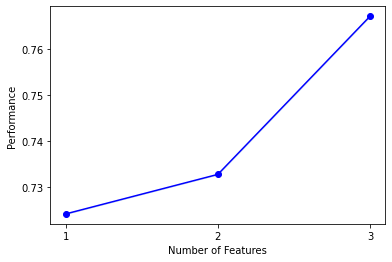

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)
sfs.fit(X, y)

"""Use the .subsets_ attribute of sfs to print a tuple that contains the names of the features chosen in the previous exercise (remember that we chose three features)."""
# Print the chosen feature names
print(sfs.subsets_[3]['feature_names'])
# Print the accuracy of the model after sequential forward selection
"""Use the .subsets_ attribute of sfs to print the accuracy of the model with three features after doing sequential forward selection.

Recall that the original model was about 80% accurate when it used all nine features. How does the accuracy of the model with only three features compare?"""
print(sfs.subsets_[3]['avg_score'])
# Plot the model accuracy
"""Use plot_sfs(sfs.get_metric_dict()) to plot the accuracy as a function of the number of features. Remember to show your plot."""
plot_sfs(sfs.get_metric_dict())
plt.show()


## Sequential Backward Selection with mlxtend
Sequential backward selection is another wrapper method for feature selection. It is very similar to sequential forward selection, but there is one key difference. Instead of starting with no features and adding one feature at a time, sequential backward selection starts with all of the available features and removes one feature at a time.

Let’s again say we want to use three of the following five features: age, height, weight, blood_pressure, and resting_heart_rate. Sequential backward selection will start by training whatever machine learning model you are using on five different feature subsets, one for each possible feature removal:

{height, weight, blood_pressure, resting_heart_rate}
{age, weight, blood_pressure, resting_heart_rate}
{age, height, blood_pressure, resting_heart_rate}
{age, height, weight, resting_heart_rate}
{age, height, weight, blood_pressure}
Let’s say that out of the five subsets, the model performed best on the subset without blood_pressure. Then the algorithm will proceed with the feature set {age, height, weight, resting_heart_rate}. It then tries removing each of age, height, weight, and resting_heart_rate.

Let’s say that of those four subsets, the model performed best without weight. Then it will arrive at the subset {age, height, resting_heart_rate}. The algorithm will stop there since it arrived at the desired number of features.

To implement sequential backward selection in mlxtend you can use the same SFS class you used for sequential forward selection. The only difference is that you have to set the parameter forward to False.

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

"""The object sbs is currently set to use sequential forward selection. Change the forward parameter so that it uses sequential backward selection instead. You can leave all the other parameters the same."""
# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit the sequential backward selection model
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=3, scoring='accuracy')

## Evaluating the Result of Sequential Backward Selection
As you learned in a previous exercise, model.subsets_ is a dictionary that contains information about feature subsets from each step of an SFS selection model. This works with sequential backward selection just like it did with sequential forward selection.

print(sbs.subsets_)
{6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.98360656]),
  'avg_score': 0.9836065573770492,
  'feature_names': ('Temperature', ' RH', ' Ws', 'Rain ', 'DMC', 'FWI')},
 5: {'feature_idx': (1, 2, 3, 4, 5),
  'cv_scores': array([0.98360656]),
  'avg_score': 0.9836065573770492,
  'feature_names': (' RH', ' Ws', 'Rain ', 'DMC', 'FWI')},
 4: {'feature_idx': (2, 3, 4, 5),
  'cv_scores': array([0.98360656]),
  'avg_score': 0.9836065573770492,
  'feature_names': (' Ws', 'Rain ', 'DMC', 'FWI')},
 3: {'feature_idx': (2, 4, 5),
  'cv_scores': array([0.9795082]),
  'avg_score': 0.9795081967213115,
  'feature_names': (' Ws', 'DMC', 'FWI')}}
You can also use plot_sfs(sfs.get_metric_dict()) to visualize the results of sequential backward selection.

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()
Model accuracy

('Age', 'Glucose', 'Resistin')
0.7413793103448276


c:\Users\momad\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\momad\anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


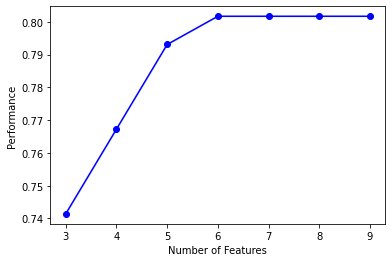

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)
sbs.fit(X, y)

"""Use the .subsets_ attribute of sbs to print a tuple that contains the names of the features chosen in the previous exercise (remember that we chose three features). Did you get the same feature set as you did with sequential forward selection?"""
# Print the chosen feature names
print(sbs.subsets_[3]['feature_names'])

"""Use the .subsets_ attribute of sbs to print the accuracy of the model after doing sequential backward selection.

Recall that the original model was about 80% accurate when it used all nine features. How does the accuracy of the model with only three features compare? How does the accuracy of sequential backward selection compare to sequential forward selection?"""
# Print the accuracy of the model after sequential backward selection
print(sbs.subsets_[3]['avg_score'])

"""Use plot_sfs(sbs.get_metric_dict()) to plot the accuracy as a function of the number of features. Notice that the accuracy sometimes decreases when a feature is removed. Do you think that too much accuracy was lost, or is that a reasonable trade-off to have a simpler model?"""
# Plot the model accuracy
plot_sfs(sbs.get_metric_dict())
plt.show()

## Sequential Forward and Backward Floating Selection
Sequential forward floating selection is a variation of sequential forward selection. It starts with zero features and adds one feature at a time, just like sequential forward selection, but after each addition, it checks to see if we can improve performance by removing a feature.

If performance can’t be improved, the floating algorithm will continue to the next step and add another feature.
If performance can be improved, the algorithm will make the removal that improves performance the most (unless removal of that feature would lead to an infinite loop of adding and removing the same feature over and over again).
For example, let’s say that the algorithm has just added weight to the feature set {age, resting_heart_rate}, resulting in the set {age, weight, resting_heart_rate}. The floating algorithm will test whether it can improve performance by removing age or resting_heart_rate. If the removal of age improves performance, then the algorithm will proceed with the set {weight, resting_heart_rate}.

Sequential backward floating selection works similarly. Starting with all available features, it removes one feature at a time. After each feature removal, it will check to see if any feature additions will improve performance (but it won’t add any features that would result in an infinite loop).

Floating selection algorithms are sometimes preferable to their non-floating counterparts because they test the model on more possible feature subsets. They can detect useful relationships between variables that plain sequential forward and backward selection might miss.

Let’s say that sequential backward floating selection is being done on the set {age, height, weight, blood_pressure, resting_heart_rate}. The algorithm removes weight, blood_pressure, and resting_heart_rate in that order. After removing resting_heart_rate, the model had an accuracy of 86%. Now it will try some feature additions. The possible feature additions give the following accuracies:

Feature subset	Accuracy
{age, height, weight}	0.95
{age, height, blood_pressure}	0.92

Will it add a feature?

If yes, create a variable called added_feature, and set it equal to the name of the feature as a string.
If no, create a variable called added_feature, and set it equal to None.

In [15]:
added_feature = 'weight'

## Sequential Forward and Backward Floating Selection with mlxtend
We can implement sequential forward or backward floating selection in mlxtend by setting the parameter floating to True. The parameter forward determines whether mlxtend will use sequential forward floating selection or sequential backward floating selection. As usual, the dictionary model.subsets_ will contain useful information about the chosen features.

Here’s an implementation of sequential backward floating selection.

# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=5,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)
We can use the .subsets_ attribute to look at feature names, just like we did with the non-floating sequential selection algorithms.

print(sbfs.subsets_[5]['feature_names'])
This outputs:

(' RH', ' Ws', 'Rain ', 'DMC', 'FWI')

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward floating selection
sffs = SFS(lr,
          k_features=3,
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[3]['feature_names'])
# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(print(sbfs.subsets_[3]['feature_names']))

('Age', 'Glucose', 'Insulin')
('Age', 'Glucose', 'Resistin')
None


## Recursive Feature Elimination
Recursive feature elimination is another wrapper method for feature selection. It starts by training a model with all available features. It then ranks each feature according to an importance metric and removes the least important feature. The algorithm then trains the model on the smaller feature set, ranks those features, and removes the least important one. The process stops when the desired number of features is reached.

In regression problems, features are ranked by the size of the absolute value of their coefficients. For example, let’s say that we trained a regression model with five features and got the following regression coefficients.

Feature	Regression coefficient
age	2.5
height	7.0
weight	-4.3
blood_pressure	-5.7
resting_heart_rate	-4.6

The regression coefficient for age has the smallest absolute value, so it is ranked least important by recursive feature elimination. It will be removed, and the remaining four features will be re-ranked after the model is trained without age.

It’s important to note that you might need to standardize data before doing recursive feature elimination. In regression problems in particular, it’s necessary to standardize data so that the scale of features doesn’t affect the size of the coefficients.

Note that recursive feature elimination is different from sequential backward selection. Sequential backward selection removes features by training a model on a collection of subsets (one for each possible feature removal) and greedily proceeding with whatever subset performs best. Recursive feature elimination, on the other hand, only trains a model on one feature subset before deciding which feature to remove next.

This is one advantage of recursive feature elimination. Since it only needs to train and test a model on one feature subset per feature removal, it can be much faster than the sequential selection methods that we’ve covered.

1. Say you want to choose four out of six possible features for a model. If you use recursive feature elimination, how many different feature subsets will you test a model on? Set this number to a variable called rfe_test_count.

Checkpoint 2 Passed

2. If you use sequential backward selection to choose four out of six features, how many different feature subsets will you test a model on? Set this number to a variable called sbs_test_count. Which method uses fewer tests?

In [17]:
rfe_test_count = 2
sbs_test_count = 6 + 5

## Recursive Feature Elimination with scikit-learn
We can use scikit-learn to implement recursive feature elimination. Since we’re using a logistic regression model, it’s important to standardize data before we proceed.

We can standardize features using scikit-learn’s StandardScaler().

from sklearn.preprocessing import StandardScaler
 
X = StandardScaler().fit_transform(X)
Once the data is standardized, you can train the model and do recursive feature elimination using RFE() from scikit-learn. As before with the sequential feature selection methods, you have to specify a scikit-learn model for the estimator parameter (in this case, lr for our logistic regression model). n_features_to_select is self-explanatory: set it to the number of features you want to select.

from sklearn.feature_selection import RFE
 
# Recursive feature elimination
rfe = RFE(lr, n_features_to_select=2)
rfe.fit(X, y)

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = np.array(health.iloc[:,:-1])
y = np.array(health.iloc[:,-1])

# Standardize the data
"""Standardize the data by uncommenting the line X = StandardScaler().fit_transform(X)."""
X = StandardScaler().fit_transform(X)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

"""Use sklearn to create an RFE object called rfe that chooses 3 features."""
# Recursive feature elimination
"""Use the .fit() method on rfe to fit the model to X and y."""
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

## Evaluating the Result of Recursive Feature Elimination
You can inspect the results of recursive feature elimination by looking at rfe.ranking_ and rfe.support_.

rfe.ranking_ is an array that contains the rank of each feature. Here are the features from the fire dataset:

['Temperature', 'RH', 'Ws', 'Rain', 'DMC', 'FWI']
Here are the feature rankings after recursive feature elimination is done on the fire dataset.

print(rfe.ranking_)
[2 5 4 1 3 1]
A 1 at a certain index indicates that recursive feature elimination kept the feature at the same index. In this example, the model kept the features at indices 3 and 5: Rain and FWI. The other numbers indicate at which step a feature was removed. The 5 (the highest rank in the array) at index 1 means that RH (the feature at index 1) was removed first. The 4 at index 2 means that Ws (the feature at index 2) was removed in the next step, and so on.

rfe.support_ is an array with True and False values that indicate which features were chosen. Here’s an example of what this looks like, again using the fire dataset.

print(rfe.support_)
[False False False  True False  True]
This array indicates that the features at indices 3 and 5 were chosen. The features at indices 0, 1, 2, and 4 were eliminated.

If you have a list of feature names, you can use a list comprehension and rfe.support_ to get a list of chosen feature names.

# features is a list of feature names
# Get a list of features chosen by rfe
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
 
print(rfe_features)
['Rain ', 'FWI']
You can use rfe.score(X, y) to check the accuracy of the model.

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

"""Create a list called rfe_features that contains the names of the features chosen by recursive feature elimination."""
# Create a list of feature names
feature_list = list(X.columns)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

# List of features chosen by recursive feature elimination
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

"""Print the accuracy of the model after doing recursive feature elimination. How does this compare to the accuracy of the original model?"""
# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X, y))


0.7327586206896551


## Review
Congratulations! You’ve learned about a few different wrapper methods. You’ve also learned how to implement them in Python and evaluate the results. Let’s recap what we covered.

Wrapper methods for feature selection are algorithms that select features by evaluating the performance of a machine learning model on different subsets of features. Here are some advantages of wrapper methods.

They can detect relationships between features that might be relevant to the machine learning model.
Unlike filter methods, they are designed to choose features that are relevant to whatever machine learning model you are using.
We covered four different greedy wrapper methods and implemented them using mlextend in Python.

Sequential forward selection adds one feature at a time.
Sequential backward selection removes one feature at a time.
Sequential forward floating selection adds (and sometimes removes) one feature at a time.
Sequential backward floating selection removes (and sometimes adds) one feature at a time.
We also covered recursive feature elimination, which ranks features by importance and removes the least important feature at every step. We used the scikit-learn library to implement that algorithm and investigate the results.

The forest fire data for this lesson were taken from the UCI Machine Learning Repository Faroudja ABID et al., Predicting Forest Fire in Algeria using Data Mining Techniques: Case Study of the Decision Tree Algorithms, International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 08 - 11 July , 2019, Marrakech, Morocco.

The breast cancer data for this lesson were taken from the UCI Machine Learning Repository. [Patricio, 2018] Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).